# Import Saved Experiment Model
This notebook demonstrates the use of NILMTK ExperimentAPI's exported model for the usage of testing the model in a different experiment

Importing the API and libraries to be used

In [4]:
# Importing libraries for working with DataFrames and visualizations
from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# Importing the following for working with NILM dataset
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CO, FHMMExact, Hart85, Mean
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict
from nilmtk.api import API

plt.style.use('ggplot')
%matplotlib inline

Functions used to import a trained model and the results

In [9]:
def import_model(filename):
    with open(filename, "rb") as pickle_in:
        model = pickle.load(pickle_in)
        #states = model['states']
        #appliance_name = model['appliance_name']
    return model

In [6]:
# Exported model from Experiment 4 in previous Exercise 1
model = import_model('TrainedModel/TrainedModel_apiEx4.pickle')

## Plot imported model's experiment result
Plots the ground truth with disaggregated results from each trained model

In [7]:
# Function to plot different model's prediction vs ground truth
def plot_result(model):
    plt.rcParams['figure.figsize'] = [15, 10]
    for i in model.gt_overall.columns:
        plt.figure()
        #plt.plot(model.test_mains[0],label='Mains reading')
        plt.plot(model.gt_overall[i],label='Truth')
        for clf in model.pred_overall:                
            plt.plot(model.pred_overall[clf][i],label=clf)
            plt.xticks(rotation=90)
        plt.title(i)
        plt.legend()
    plt.show()

/opt/conda/envs/nilmtk-env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


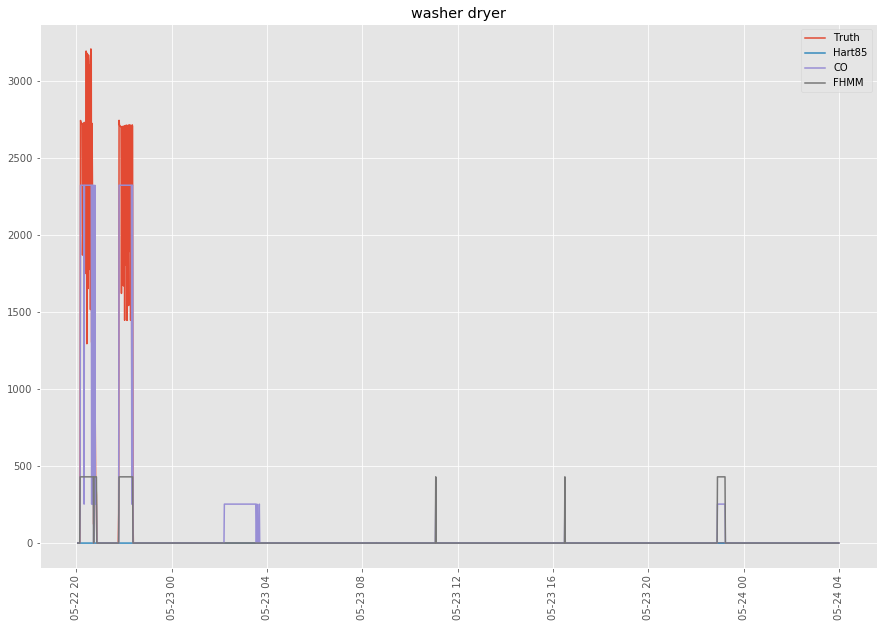

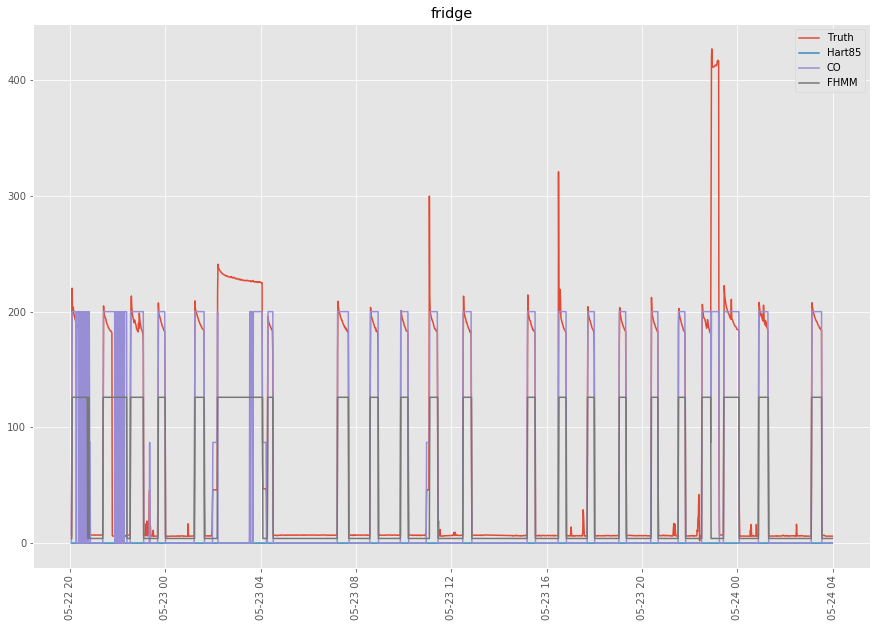

In [8]:
plot_result(model)

## Exercise: View model's methods and parameters
Explore the imported model's parameters and methods saved from the experiment in Exercise 1 (Experiment 4)

In [12]:
model.appliances

['washer dryer', 'fridge']

In [13]:
model.classifiers

[('Hart85', <nilmtk.disaggregate.hart_85.Hart85 at 0x7f35fbba6e50>),
 ('CO', <nilmtk.disaggregate.combinatorial_optimisation.CO at 0x7f35fbbb3a10>),
 ('FHMM', <nilmtk.disaggregate.fhmm_exact.FHMMExact at 0x7f35fbbb3c90>)]